<a href="https://colab.research.google.com/github/KevinChaca/DjangoGirls2017/blob/master/TensorFlowKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(100, 100)
[[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]


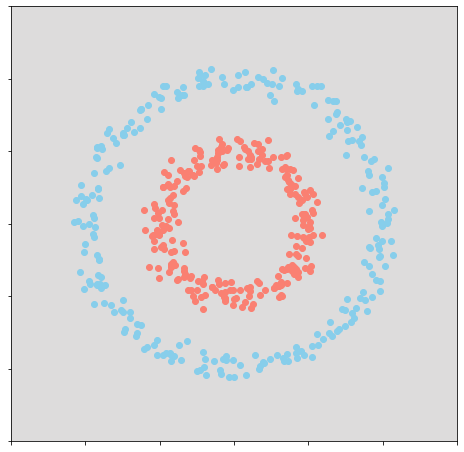

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

#Creamos nuestros datos artificiales, donde buscamos clasificar
#dos anillos concentricos de datos
X,Y = make_circles(n_samples=500,factor=0.5, noise=0.05)

#Resolucion del mapa de prediccion
res=100

#coordenadas del mapa de prediccion
_x0= np.linspace(-1.5,1.5,res)
_x1= np.linspace(-1.5,1.5,res)

#Input con cada combo de coordenadas del mapa de prediccion
_pX= np.array(np.meshgrid(_x0,_x1)).T.reshape(-1,2)

#objeto vacio a 0.5 del mapa de predccion
_pY=np.zeros((res,res))+0.5
print(_pY.shape)
print(_pY)
#Visualizacion del mapa de prediccion
plt.figure(figsize=(8,8))
plt.pcolormesh(_x0,_x1,_pY,cmap="coolwarm",vmin=0,vmax=1)

#Visualizacion de la nube de datos
plt.scatter(X[Y==0,0], X[Y==0,1], c= "skyblue")
plt.scatter(X[Y==1,0], X[Y==1,1], c= "salmon")

plt.tick_params(labelbottom=False, labelleft=False)

(500,)
(500, 2)
(500,)
(500,)


ValueError: ignored

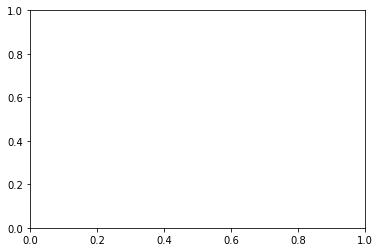

In [ ]:
from matplotlib import animation
from IPython.core.display import display, HTML
import time
from IPython.display import clear_output
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#Creamos los puntos de entrada de datos de nuestro grafo
iX= tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])


nn= [2,16,8,1] #Numero de neuronas por capa
lr= 0.01 #Learning Rate del optimizador

#Capa 1

W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name= 'Weight_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name= 'bias_1')

l1= tf.nn.relu(tf.add(tf.matmul(iX,W1),b1))

#Capa 2

W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name= 'Weight_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name= 'bias_2')

l2= tf.nn.relu(tf.add(tf.matmul(l1,W2),b2))

#Capa 3

W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name= 'Weight_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name= 'bias_3')

#Vector de predicciones
pY= tf.nn.sigmoid(tf.add(tf.matmul(l2,W3),b3))[:,0]

#evaluacion de las predicciones
loss= tf.losses.mean_squared_error(pY, iY)

#Crear el optimizador que entrenara la red
optimizer= tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

n_steps=1000 #numero de pasos para entrenar a la red
lossPlt=[]
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(n_steps):
    #Evalaucion de los tensores de entrenamiento, coste y prediccion
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={iX:X, iY:Y})
    print(_pY.shape)
    if step % 25 ==0:
      lossPlt.append(_loss)
      print(X.shape)
      print(Y.shape)
      print(_pY.shape)
      #calculo del accuracy entre el vector real y las predicciones
      acc= np.mean(np.round(_pY)==Y)

      plt.pcolormesh(X[:,0],X[:,1],_pY,cmap="coolwarm",vmin=0,vmax=1)
      #plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm")
      plt.axis("equal")

      plt.scatter(X[Y==0,0], X[Y==0,1], c= "skyblue")
      plt.scatter(X[Y==1,0], X[Y==1,1], c= "salmon")
      clear_output(wait=True)
      plt.show()
      plt.plot(range(len(lossPlt)),lossPlt)
      plt.show()
      time.sleep(0.5)

      #print('Step', step, '/', n_steps, ' - Loss=', _loss, '- Acc:', acc)


In [ ]:
Z = np.random.rand(6, 10)
print(Z)

[[0.8008855  0.65716803 0.50951398 0.76035555 0.02028186 0.57885506
  0.6156577  0.03720979 0.22352476 0.07826149]
 [0.6791941  0.67782448 0.89808225 0.22091161 0.26475861 0.73032304
  0.06493885 0.0758541  0.13449536 0.98859014]
 [0.65968624 0.58899974 0.40007018 0.64472051 0.88970396 0.60882486
  0.7650276  0.6485798  0.92019845 0.10703297]
 [0.73345078 0.65047395 0.06906749 0.21434465 0.87300871 0.02025437
  0.86544727 0.84155051 0.97064184 0.36428388]
 [0.07362317 0.42323451 0.60575242 0.22332434 0.02303911 0.18247965
  0.69657165 0.00961653 0.79124441 0.97200571]
 [0.48988948 0.57721792 0.82648514 0.81237923 0.77444404 0.02225399
  0.04776327 0.33906288 0.74783799 0.46521212]]
